# Simulation (maths) V2A Lecture Notes

Deze notebook bevat extra toelichting en uitwerkingen van de formatieve opdrachten voor het wiskunde deel van Simulation voor klas V2A in 2021. Ik gebruik deze om tijdens de les correcte uitwerkingen te delen. Om studenten te kans te geven om ook in hun eigen voorbereidingstijd hiernaar terug te verwijzen heb ik deze publiekelijk aangeboden op [GitLab](https://gitlab.com/hu-hbo-ict/ai/simulation-maths-v2a-2021).

<div style="text-align: right">— Brian</div>

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Les 0
- Introductie
- Opdrachten

<img src="euler.png" width="600">


## Autowaarde

Op $t = 2021$ koop je een auto. Per tijdseenheid (een jaar) wordt de auto ongeveer $10\%$ minder waard.
 - Stel de differentiaalvergelijk op
 - Pas forward Euler toe
 - Bereken de waarde van de auto na 10 jaar als je hem nu koopt voor € 30.000,-

### Uitwerking
  - Op $t = 2021$ koop je een auto. Per tijdseenheid (een jaar) wordt de auto ongeveer $10\%$ minder waard.
  - Stel de differentiaalvergelijk op
 $$\frac{dW(t)}{dt} = -0.1 W(t)$$
 - Pas forward Euler toe
 $$W(t+h) = W(t) + h \big(-0.1 \cdot W(t)\big)$$
 - Bereken de waarde van de auto na 10 jaar als je hem nu koopt voor € 30.000,-

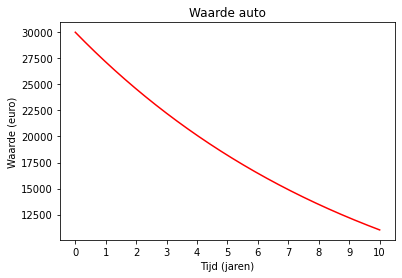

11034.871229216005

In [31]:
h = 1/365 # 1 dag

def euler(initial, h, steps, formula):
    values = [initial]
    for t in range(steps):
        values.append(values[-1] + h * formula(values[-1]))
    return values

worth = euler(initial = 30000, h = h, steps = 365*10, formula = lambda x: -0.1 * x)

plt.plot(worth, 'r')
plt.title("Waarde auto")
plt.xlabel("Tijd (jaren)")
plt.ylabel("Waarde (euro)")
plt.xticks(ticks= list(map(lambda x: x*365, range(11))), labels=range(11))
plt.show()

worth[-1]

## Mieren

Op een berg wonen mieren. Iedere maand legt de koningin $1000$ eieren (d.w.z. nieuwe mieren). $20\%$ van de mieren wordt iedere maand opgegeten door de miereneter. In maand 4 $(t = 4)$ zijn er $800$ mieren.
 - Stel differentiaalvergelijking op
 - Pas forward Euler toe
 - Bereken het aantal mieren op $t = 5$, $t = 6$, $\dots$, $t = 20$.
 
### Uitwerking
Stel de differentiaalvergelijking op
$$\frac{dA(t)}{dt} = 1000 - 0.2 \cdot A(t)$$

Pas forward Euler toe
$$A(t+h) = A(t) + h \big(1000 - 0.2 \cdot A(t)\big)$$

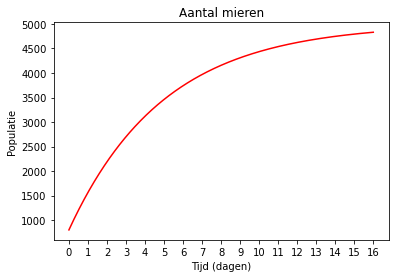

(828.0, 855.8133333333333, 1226.2820282929451)

In [32]:
h = 1/30 # 1 dag

population = [800]
for t in range(16 * 30):
    population.append(population[t] + h * (1000 - 0.2 * population[t]))

plt.plot(population, 'r')
plt.title("Aantal mieren")
plt.xlabel("Tijd (dagen)")
plt.ylabel("Populatie")
plt.xticks(ticks= list(map(lambda x: x*30, range(17))), labels=range(17))
plt.show()
        
population[1], population[2], population[16]

## Chemische Oplossing

In een groot vat is $8$ kg chemische stof opgelost in water. Per uur tijd wordt $15\%$ van de aanwezige chemische stof weggespoeld, terwijl er per uur $5$ kg van deze stof wordt toegevoegd.

 - Stel differentiaalvergelijking op en pas forward Euler toe
 - Hoeveel kg van de chemische stof is na $10$ uur in het vat aanwezig?
 - Plot de tijdgrafiek. Treed er verzadiging op (maximale hoeveelheid van de stof bereikt)?
 
### Uitwerking

Stel de differentiaalvergelijking op
$$\frac{dC(t)}{dt} = 5 - 0.15 \cdot C(t)$$

Pas forward Euler toe
$$C(t+h) = C(t) + h \big(5 - 0.15 \cdot C(t)\big)$$

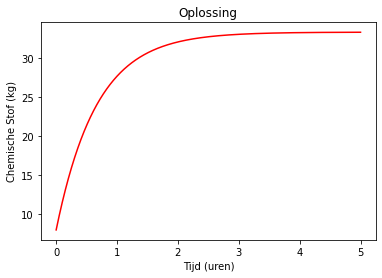

27.691309026601093

In [33]:
h = 1/60 # 1 minuut

chemical = [8]
for t in range(50 * 60):
    chemical.append(chemical[t] + h * (5 - 0.15 * chemical[t]))

plt.plot(chemical, 'r')
plt.title("Oplossing")
plt.xlabel("Tijd (uren)")
plt.ylabel("Chemische Stof (kg)")
plt.xticks(ticks= list(map(lambda x: x*600, range(6))), labels=range(6))
plt.show()

chemical[10*60]

# Les 1
- Socrative
- Opdrachten

## Waar gaan we naartoe werken?
![](apollo.png)


## Maan
![](moon.png)
$$x(t) = 3.84 \cdot 10^8 \cdot \cos\left(\frac{2\pi t}{27}\right)$$
$$y(t) = 3.84 \cdot 10^8 \cdot \sin\left(\frac{2\pi t}{27}\right)$$

- $t$ in dagen
- $x, y$ in meters
- Nog geen DEs

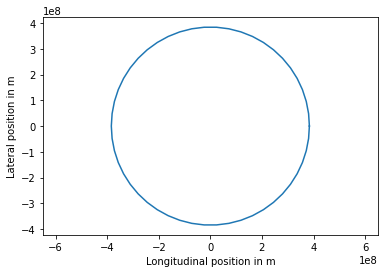

In [34]:
moon_distance = 384e6 # m

num_steps = 50
x = []
y = []

for step in range(num_steps + 1):
    angle = step * 2 * math.pi / num_steps  # radians
    x.append(moon_distance * math.cos(angle))
    y.append(moon_distance * math.sin(angle))

plt.axis('equal')
plt.plot(x, y)
axes = plt.gca()
axes.set_xlabel('Longitudinal position in m')
axes.set_ylabel('Lateral position in m')
plt.show()

## Valbeweging
![](falling.png)

## Tweede wet van Newton

$$a(t) = \frac{F\big(x(t),v(t),t\big)}{m}$$

- Tweede orde DE
- $F$ is de kracht die uitgeoefend wordt, (mogelijk) afhankelijk van plaats, snelheid en tijd
- $v(t) = \frac{dx}{dt}$ is de snelheid (velocity) op tijdstip $t$
- $a(t) = \frac{d^2x}{dt^2}$ is de versnelling (acceleration) op tijdstip $t$
- $m$ is de massa van het object

### Zwaartekracht: val van een bal

#### Zwaartekracht op aarde is constant $9.81\ m \cdot s^{-2}$ (oftewel: $9.81\ m / s^2)$
$$a(t) = -9.81\ m \cdot s^{-2}$$

#### Beginpositie is $0$ (gegeven)
$$x(0) = 0$$

#### Beginsnelheid is $0$ (gegeven)
$$v(0) = 0$$

#### Vergelijking voor acceleratie / delta snelheid
$$a(t) = \frac{dv}{dt} = -9.81$$

#### Forward Euler op acceleratie / delta snelheid
$$v(t+h) = v(t) + h \cdot  -9.81$$

#### Vergelijking voor snelheid / delta positie
$$\frac{dx}{dt} = v(t)$$

#### Forward Euler
$$x(t+h) = x(t) + h \cdot v(t)$$

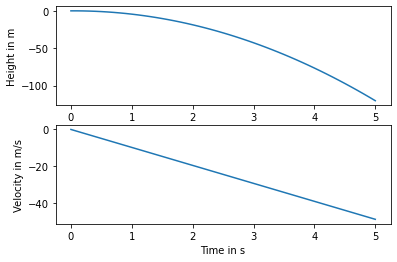

In [35]:
h = 0.1
g = 9.81  # m/s²

num_steps = 50

t = [0]
x = [0]
v = [0]

for step in range(1,num_steps + 1):
    t.append(t[-1] + h)
    x.append(x[-1] + h * v[-1])
    v.append(v[-1] - h * g)

axes_height = plt.subplot(211)
plt.plot(t, x)
axes_velocity = plt.subplot(212)
plt.plot(t, v)
axes_height.set_ylabel('Height in m')
axes_velocity.set_ylabel('Velocity in m/s')
axes_velocity.set_xlabel('Time in s')
plt.show()

## Met wrijving

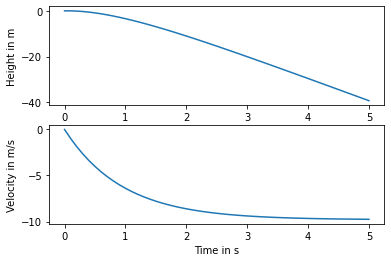

In [60]:
h = 0.1
g = 9.81        # m/s²
friction = 0.1

num_steps = 50

t = [0]
x = [0]
v = [0]

for step in range(1,num_steps + 1):
    t.append(t[-1] + h)
    x.append(x[-1] + h * v[-1])
    v.append(v[-1] - h * g - v[-1] * friction)

axes_height = plt.subplot(211)
plt.plot(t, x)
axes_velocity = plt.subplot(212)
plt.plot(t, v)
axes_height.set_ylabel('Height in m')
axes_velocity.set_ylabel('Velocity in m/s')
axes_velocity.set_xlabel('Time in s')
plt.show()

## Veer

Een denkbeeldige veer is bevestigd aan de oorsprong $(x = 0)$ en trekt een bal voortdurend terug. De kracht voor  zo'n veer is: 

![](spring.png)

Dit voorbeeld lijkt op de vallende bal van net, in dat we te maken hebben met positie, snelheid en versnelling. Het verschil is dat de vernelling hier niet constant is, maar per stap berekend moet worden. Dit doen we door de kracht op het object uit te rekenen. De kracht op een object aan een veer is $F = -k x$, met een veerconstante $k$. De $k$ in deze oefening is $1\ Nm^{-1} = 1\ kg \cdot m \cdot s^{-2} \cdot m^{-1} = 1\ kg \cdot s^{-2}$. Dit kunnen we vermenigvuldigen met de afstand tot de oorsprong (in meters) om de kracht $F$ in $N$ oftewel $kg \cdot m s^{-2}$ te vinden. De versnelling is afhankelijk van deze kracht en de massa. Om op $ms^{-2}$ uit te komen delen we de kracht door de massa. Totaal moeten we dus de veerconstante met de afstand vermenigvuldigen, dit delen door de massa, en de gevonden versnelling gebruiken om de nieuwe snelheid $v$ te vinden.

Maak plaatjes van de positie en de snelheid van de bal ten opzichte van de tijd, net als bij de valbeweging. Ga ervan uit dat op tijdstip 0, de positie van de bal 1 is (dus `x[0] = 1`) en de snelheid 0 (`v[0] = 0`). We negeren voor dit voorbeeld de zwaartekracht en wrijving even.

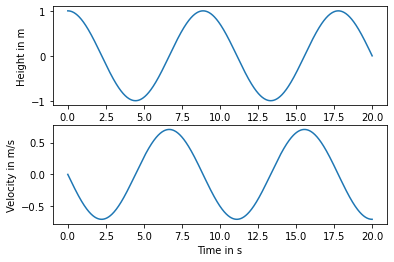

In [65]:
h = 0.01

# veerconstante
k     = 1  # N / m   =  kg ⋅ m / s² / m  =  kg / s² 
massa = 2  # kg  

num_steps = 2000
t = [0]
x = [1]
v = [0]

for step in range(1, num_steps + 1):
    t.append(t[-1] + h)
    x.append(x[-1] + h * v[-1])
    a = k  * x[-1] / massa
    v.append(v[-1] - h * a)

axes_height = plt.subplot(211)
plt.plot(t, x)
axes_velocity = plt.subplot(212)
plt.plot(t, v)
axes_height.set_ylabel('Height in m')
axes_velocity.set_ylabel('Velocity in m/s')
axes_velocity.set_xlabel('Time in s')
plt.show()

## Apollo 13
![](apollo.png)

### Gegeven formule
$$\frac{d^2\vec x}{dt^2} = -\frac{Gm}{r(t)^3} \cdot \vec x (t)$$
- $m$ is de massa van de aarde
- $G$ is de gravitatieconstance $6.67\cdot 10^{-11} N \cdot m^2 / kg$
- $r(t) = \sqrt{x(t)^2 + y(t)^2}$

$$\begin{bmatrix}
\frac{d^2 x}{dt^2} \\
\frac{d^2 y}{dt^2}
\end{bmatrix} = - \frac{Gm}{r(t)^3} \cdot \begin{bmatrix}
x(t) \\
y(t)
\end{bmatrix}$$

### Euler
$$x(t + h) = x(t) + h \cdot v_x(t)$$
$$v_x(t+h) = v_x(t) - h \cdot \frac{Gm}{r(t)^3} \cdot x(t)$$
$$y(t + h) = x(t) + h \cdot v_y(t)$$
$$v_y(t+h) = v_x(t) - h \cdot \frac{Gm}{r(t)^3} \cdot y(t)$$

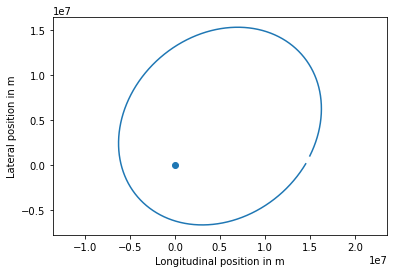

In [11]:
h                      = 0.1       # s
earth_mass             = 5.97e24   # kg
gravitational_constant = 6.67e-11  # N ⋅ m² / kg

def acceleration(x):
    vector_to_earth = - x # earth at origin
    return gravitational_constant * earth_mass / np.linalg.norm(vector_to_earth) ** 3 * vector_to_earth

num_steps = 130000

x = [np.array([15e6,1e6])]
v = [np.array([2e3,4e3])]

for i in range(0, num_steps):
    a = acceleration(x[-1])
    x.append(x[-1] + h * v[-1])
    v.append(v[-1] + h * a)
    
plt.plot(list(map(lambda x: x[0], x)), list(map(lambda x: x[1], x)))
plt.scatter(0, 0)
plt.axis('equal')
axes = plt.gca()
axes.set_xlabel('Longitudinal position in m')
axes.set_ylabel('Lateral position in m')
plt.show()

# Les 2
- Socrative
- Opdrachten

## Vandaag
- Alternatieve Solvers - methode van Heun
- Truncation Error

## Auto (recap)
- Op $t = 2021$ koop je een auto. Per tijdseenheid (een jaar) wordt de auto ongeveer $10\%$ minder waard.
- Stel de differentiaalvergelijk op
$$\frac{dW(t)}{dt} = -0.1 W(t)$$
- Pas forward Euler toe
$$W(t+h) = W(t) + h \big(-0.1 \cdot W(t)\big)$$

### Impliciete aanname bij Euler
Verandering aan het begin van het tijdvak geldt voor het hele tijdvlak

<img src="euler_error1.png" width="400">

### Nieuw plan (Heun)

<img src="euler_error2.png" width="400">

- Bepaal de verandering aan het begin van de interval:
$$\frac{dW}{dt}(t) = \color{green}{-0.1 \cdot W(t)} $$ 
- Bepaal de verandering aan het einde van de interval:
$$\frac{dW}{dt}(t+h) = \color{blue}{-0.1 \cdot W(t+h)} $$ 

Om achter $\frac{dW}{dt}(t+h)$ te komen hebben we eerst een schatting van $W(t+h)$ nodig, met (forward) Euler:

$$W(t+h) = \color{red}{W(t) + h \big(-0.1 \cdot W(t)\big)}$$

Dus

$$\frac{dW}{dt}(t+h) = \color{blue}{ -0.1 \cdot \big( \color{red}{ W(t) -0.1 \cdot W(t) } \big) }$$ 

- Neem het gemiddelde van de voorspelling aan het begin en eind

$$W(t+h) = W(t) + h \cdot \left( \frac{ \color{green}{\big(-0.1 \cdot W(t)\big)} +
\color{blue}{ -0.1 \cdot  \big( \color{red}{W(t) -0.1 \cdot W(t) } \big) }
}{2} \right)$$


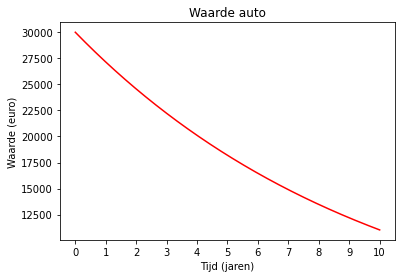

11036.39004746868

In [50]:
h = 1/52 # 1 dag

initial = 30000 # EUR
steps = 10 * 52

worth = [initial]
for t in range(steps):
    euler = worth[-1] + h * (- 0.1 * worth[-1])
    heun  = worth[-1] + h * (- 0.1 * worth[-1] - 0.1 * euler) / 2
    worth.append(heun)

plt.plot(worth, 'r')
plt.title("Waarde auto")
plt.xlabel("Tijd (jaren)")
plt.ylabel("Waarde (euro)")
plt.xticks(ticks= list(map(lambda x: x*52, range(11))), labels=range(11))
plt.show()

worth[-1]

## Mieren (Heun)

Op een berg wonen mieren. Iedere maand legt de koningin $1000$ eieren (d.w.z. nieuwe mieren). $20\%$ van de mieren wordt iedere maand opgegeten door de miereneter. In maand 4 $(t = 4)$ zijn er $800$ mieren.
 
### Differentiaalvergelijking
$$\frac{dA(t)}{dt} = 1000 - 0.2 \cdot A(t)$$

### Forward Euler
$$A_{Euler}(t+h) = A(t) + h \big(1000 - 0.2 \cdot A(t)\big)$$

### Heun
$$A_{Heun}(t+h) = A(t) + h \left( \frac{\color{green}{\big(1000 - 0.2 \cdot A(t)\big)} + \color{blue}{\big(1000 - 0.2 \cdot A_{Euler}(t+h)\big)} }{2} \right )$$

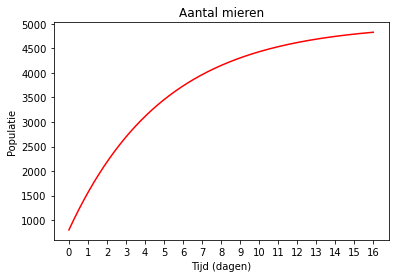

(827.9066666666666, 855.627909037037, 1224.9310300962668)

In [55]:
h = 1/30 # 1 dag

population = [800]
for t in range(16 * 30):
    euler = population[t] + h * (1000 - 0.2 * population[t])
    heun  = population[t] + h * (1000 - 0.2 * population[t] + 1000 - 0.2 * euler) / 2
    population.append(heun)

plt.plot(population, 'r')
plt.title("Aantal mieren")
plt.xlabel("Tijd (dagen)")
plt.ylabel("Populatie")
plt.xticks(ticks= list(map(lambda x: x*30, range(17))), labels=range(17))
plt.show()
        
population[1], population[2], population[16]

## Chemische Oplossing (Heun)

In een groot vat is $8$ kg chemische stof opgelost in water. Per uur tijd wordt $15\%$ van de aanwezige chemische stof weggespoeld, terwijl er per uur $5$ kg van deze stof wordt toegevoegd.

### Differentiaalvergelijking
$$\frac{dC(t)}{dt} = 5 - 0.15 \cdot C(t)$$

### Forward Euler
$$C(t+h) = C(t) + h \big(5 - 0.15 \cdot C(t)\big)$$

### Heun
$$C_{Heun}(t+h) = C(t) + h \left( \frac{\color{green}{\big(5 - 0.15 \cdot C(t)\big)} + \color{blue}{\big(5 - 0.15 \cdot C_{Euler}(t+h)\big)} }{2} \right )$$

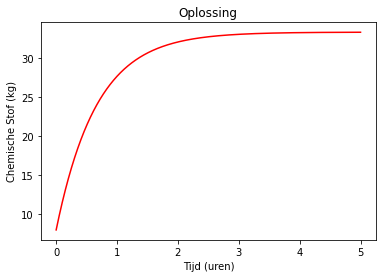

27.68069376075367

In [64]:
h = 1/60 # 1 minuut

chemical = [8]
for t in range(50 * 60):
    euler = chemical[t] + h * (5 - 0.15 * chemical[t])
    heun  = chemical[t] + h * (5 - 0.15 * chemical[t] + 5 - 0.15 * euler) / 2
    chemical.append(heun)
    
plt.plot(chemical, 'r')
plt.title("Oplossing")
plt.xlabel("Tijd (uren)")
plt.ylabel("Chemische Stof (kg)")
plt.xticks(ticks= list(map(lambda x: x*600, range(6))), labels=range(6))
plt.show()

chemical[10*60]

## Veerbeweging - Heun en nauwkeurigheid

Maak de opdracht "Nauwkeurigheid van veerbeweging". De error kun je berekenen door het absolute verschil van je voorspelling en de verwachte waarde te nemen. Deze is te berekenen met

$$-2 \cdot \sin\left({\sqrt{k}\cdot t}\right)$$

In [37]:
def plot_spring(t, x, v, k = 1):
    axes_height = plt.subplot(211)
    axes_height.plot(t, x)
    # correcte antwoord in groen
    axes_height.plot(t, -2 * np.sin(np.sqrt(k) * np.array(t)), color = 'green')
    axes_velocity = plt.subplot(212)
    axes_velocity.plot(t, v)
    axes_height.set_ylabel('Positie in m')
    axes_velocity.set_ylabel('Velocity in m/s')
    axes_velocity.set_xlabel('Time in s')

    plt.show()

def error_plot(t, x, v, k = 1):
    error = np.zeros(len(t))
    for i in range(len(t)):
        error[i] = np.abs(x[i] + 2 * np.sin(np.sqrt(k) * t[i]))
    fig, ax = plt.subplots()
    ax.plot(t, error)
    ax.set_ylabel('error (m)')
    ax.set_xlabel('tijd (sec)')
    ax.set_ylim(0,1)
    plt.show()

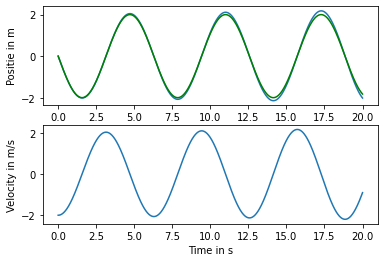

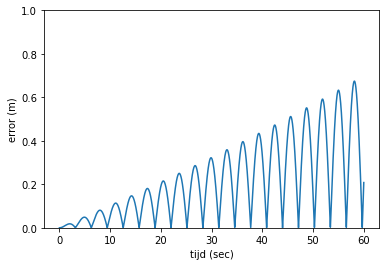

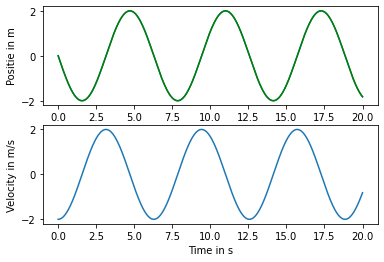

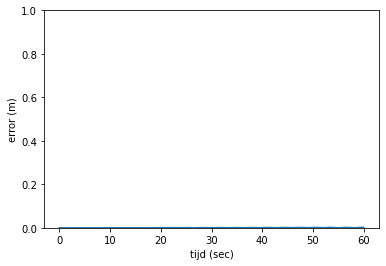

In [108]:
k = 1 # veerconstante
massa = 1

def forward_euler(num_steps = 2000):
    h=0.01

    t = [0]
    x = [0]
    v = [-2]
    
    for step in range(num_steps):
        t.append(t[step] + h)
        x.append(x[step] + h * v[step])
        a = k * x[step] / massa
        v.append(v[step] - h * a)

    return(t, x, v)

t, x, v = forward_euler()

plot_spring(t, x, v)

t, x, v = forward_euler(6000)
error_plot(t, x, v)

def heun(num_steps = 2000):
    h=0.01

    t = [0]
    x = [0]
    v = [-2]
    
    for step in range(num_steps):
        t.append(t[step] + h)
        x_E = x[step] + h * v[step]
        a = k * x[step] / massa
        v_E = v[step] - h * a

        x.append(x[step] + h * (v[step] + v_E)/2)
        a_H = k * x_E / massa
        v.append(v[step] + h * (- a - a_H)/2)
    return(t, x, v)

t, x, v = heun()

plot_spring(t, x, v)

t, x, v = heun(6000)
error_plot(t, x, v)

## Geostationaire baan
In de formules gebruiken we $r = \sqrt{x(t)^2 + y(t)^2}$ voor de afstand, $m$ voor de massa en $G$ voor de gravitatieconstante.

### Euler

$$x_{Euler} = x(t) + h \cdot v_x(t)$$
$$v_{x_{Euler}} = v_x(t) - h \cdot \frac{Gm}{r^3}\cdot x(t)$$
$$y_{Euler} = x(t) + h \cdot v_y(t)$$
$$v_{y_{Euler}} = v_x(t) - h \cdot \frac{Gm}{r^3}\cdot y(t)$$

### Heun

$$x(t+h) = x(t) + \frac{h}{2} \cdot \left(v_x(t) + v_{x_{Euler}}\right)$$
$$v_x(t+h) = v_x(t) + \frac{h}{2} \cdot -\frac{Gm}{r^3} \cdot \big(x(t) + x_{Euler}(t)\big)$$
$$y(t+h) = y(t) + \frac{h}{2} \cdot \left(v_y(t) + v_{y_{Euler}}\right)$$
$$v_y(t+h) = v_y(t) + \frac{h}{2} \cdot -\frac{Gm}{r^3} \cdot \big(y(t) + x_{Euler}(y)\big)$$


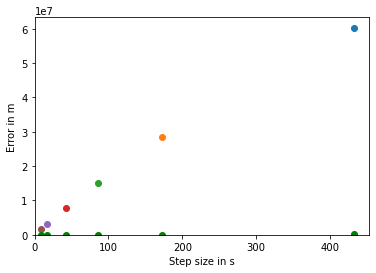

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

total_time = 24 * 3600 # s
g = 9.81 # m / s2
earth_mass = 5.97e24 # kg
gravitational_constant = 6.67e-11 # N m2 / kg2
radius = (gravitational_constant * earth_mass * total_time ** 2 / 4 / math.pi ** 2) ** (1/3) # m
speed = 2.0 * math.pi * radius / total_time # m / s

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth at origin
    return gravitational_constant * earth_mass / np.linalg.norm(vector_to_earth) ** 3 * vector_to_earth


def heuns_method(num_steps):
    ### Old Euler Method
    h = total_time / num_steps
    x = np.zeros([num_steps + 1, 2]) # two-dimensional array to store results
    v = np.zeros([num_steps + 1, 2])

    x[0, 0] = radius # three o'clock position
    v[0, 1] = speed # only upwards motion at start

    for step in range(num_steps):
        x[step + 1] = x[step] + h * v[step]
        v[step + 1] = v[step] + h * acceleration(x[step])

    error = np.linalg.norm(x[-1] - x[0]) # difference between end position and start position
    plt.scatter(h, error)
    # End Euler Method

    ### Heun's Method
    for step in range(num_steps):
        a = acceleration(x[step])
        x_E = x[step] + h * v[step]
        v_E = v[step] + h * a
        x[step + 1] = x[step] + h * 0.5 * (v[step] + v_E)
        v[step + 1] = v[step] + h * 0.5 * (a + acceleration(x_E))

    error = np.linalg.norm(x[-1] - x[0])
    plt.scatter(h, error, c = 'g')
    # End Heun's Method


for num_steps in [200, 500, 1000, 2000, 5000, 10000]:
    error = heuns_method(num_steps)

plt.xlim(xmin = 0.)
plt.ylim(ymin = 0.)
axes = plt.gca()
axes.set_xlabel('Step size in s')
axes.set_ylabel('Error in m')
plt.show()

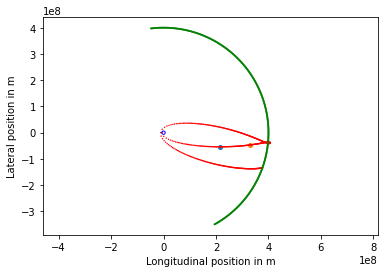

In [ ]:
earth_mass = 5.97e24 # kg
earth_radius = 6.378e6 # m (at equator)
gravitational_constant = 6.67e-11 # m3 / kg s2
moon_mass = 7.35e22 # kg
moon_radius = 1.74e6 # m
moon_distance = 400.5e6 # m (actually, not at all a constant)
moon_period = 27.3 * 24.0 * 3600. # s
moon_initial_angle = math.pi / 180. * -61. # radian

total_duration = 12. * 24. * 3600. # s
marker_time = 0.5 * 3600. # s
tolerance = 100000. # m


def moon_position(time):
    # Task 1: Compute the moon's position (a vector) at time t starting at moon_initial_angle
    position = np.zeros(2)
    position[0] = moon_distance * np.cos(moon_initial_angle + 2 *np.pi / moon_period * time)
    position[1] = moon_distance * np.sin(moon_initial_angle + 2 *np.pi / moon_period * time)
    return position


def acceleration(time, position):
    # Task 2: Compute the spacecraft's acceleration due to gravity; total acceleration is a combination (addition) of the pull from the Earth and the pull from the Moon
    vector_to_earth = -position
    vector_to_moon = moon_position(time) - position
    ### TODO: Your code here
    acc = gravitational_constant * earth_mass / (np.linalg.norm(vector_to_earth)**3) * vector_to_earth + \
          gravitational_constant * moon_mass / (np.linalg.norm(vector_to_moon)**3) * vector_to_moon   
    return acc


def apply_boost():
    boost = 10. # m/s
    position_list = [np.array([-6.701e6, 0.])] # m
    velocity_list = [np.array([0., -10.818e3])] # m / s
    times_list = [0]
    position = position_list[0]
    velocity = velocity_list[0]
    current_time = 0.
    h = 0.1 # s, set as initial step size but will store current step size
    h_new = h # s, will store the adaptive step size of the next step
    mcc2_burn_done = False
    dps1_burn_done = False

    while current_time < total_duration:
        # Task 4: Include a retrograde rocket burn at 101104 seconds that reduces
        # the velocity by 7.04 m/s and include a rocket burn that increases the
        # velocity at 212100 seconds by the amount in variable boost. Both velocity
        # changes should happen in the direction of the rocket's motion at the
        # time they occur.
        ### TODO: Your code here
        if current_time >= 101104 and not mcc2_burn_done:
            velocity = velocity - 7.04 * velocity / np.linalg.norm(velocity)
            plt.scatter(position[0], position[1], s = 16.)
            mcc2_burn_done = True

        if current_time >= 212100 and not dps1_burn_done:
            velocity = velocity + boost * velocity / np.linalg.norm(velocity)
            plt.scatter(position[0], position[1], s = 16.)
            dps1_burn_done = True


        # Task 3: Implement Heun's method with adaptive step size.
        # Heun's method
        acceleration0 = acceleration(current_time, position)
        positionE = position + h * velocity
        velocityE = velocity + h * acceleration0
        positionH = position + h * 0.5 * (velocity + velocityE)
        velocityH = velocity + h * 0.5 * (acceleration0 + acceleration(current_time, positionE))
        position = positionH
        velocity = velocityH

        LTE_E = np.linalg.norm(positionE - positionH) + total_duration * np.linalg.norm(velocityE-velocityH)
        h_new = h * np.sqrt(tolerance / (LTE_E + 1e-50))
        h_new = min(0.5 * marker_time, max(0.1, h_new)) # restrict step size to reasonable range

        current_time += h
        h = h_new
        position_list.append(position.copy())
        velocity_list.append(velocity.copy())
        times_list.append(current_time)

    return position_list, velocity_list, times_list, boost

position, velocity, current_time, boost = apply_boost()

def plot_path(position_list, times_list): # Function for drawing results
    axes = plt.gca()
    axes.set_xlabel('Longitudinal position in m')
    axes.set_ylabel('Lateral position in m')
    previous_marker_number = -1;
    for position, current_time in zip(position_list, times_list):
        if current_time >= marker_time * previous_marker_number:
            previous_marker_number += 1
            plt.scatter(position[0], position[1], s=2., facecolor='r', edgecolor='none')
    axes.add_patch(ptc.CirclePolygon((0., 0.), earth_radius, facecolor='none', edgecolor='b'))
    for i in range(int(total_duration / marker_time)):
        moon_pos = moon_position(i * marker_time)
        axes.add_patch(ptc.CirclePolygon(moon_pos, moon_radius, facecolor='none', edgecolor='g', alpha=0.7))

    plt.axis('equal')
    plt.show()

plot_path(position, current_time)


## Hogere orde benaderingen

Het getal $e$ (ook wel het getal van Euler) is een constante die je vaak tegen zal komen in de wiskunde, vergelijkbaar met $\pi$. $e$ is interessant omdat $e^x$ de afgeleide van zichzelf is. Met andere woorden, de symbolische oplossing van $\frac{dy}{dt}(t) = y(t)$ met $y(0) = 1$ is $y(t) = e^t$ (dus $y(1) = e^1 = 1$).

Probeer de symbolische oplossing te benaderen met Euler's en Heun's methodes. Begin bij $t=0$ en ga door tot $t=1$. Hoeveel correcte decimalen krijg je uit beide methodes?

Geef het aantal stappen (5, 10, 20, 100):  20


Volgens Euler's methode en 20 stappen, is e = 2.653298
Volgens Heun's methode en 20 stappen, is e = 2.717191


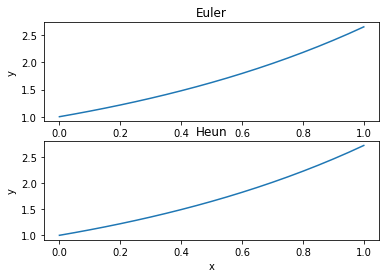

In [ ]:
n = int(input("Geef het aantal stappen (5, 10, 20, 100): ")) 
stepsize = 1 / n

# Euler method
ex = np.zeros(n + 1)     # Euler x
evalue = np.zeros(n + 1) # waarden f(x) volgens Euler benadering
ex[0] = 0
evalue[0] = 1

for stap in range(1, n + 1):
    ex[stap]    = ex[stap - 1] + stepsize
    evalue[stap] = evalue[stap - 1] + stepsize * evalue[stap - 1]

print("Volgens Euler's methode en", n, "stappen, is e = {:.6f}".format(evalue[n]))

# Heun method
hx = np.zeros(n + 1)     # Heun x
hvalue = np.zeros(n + 1) # waarden f(x) volgens Heun benadering
hx[0] = 0
hvalue[0] = 1

for stap in range(1, n + 1):
    hx[stap]    = hx[stap - 1] + stepsize
    hval_ = hvalue[stap - 1] + stepsize * hvalue[stap - 1]
    hvalue[stap] = hvalue[stap - 1] + stepsize / 2 * (hvalue[stap - 1] + hval_)

print("Volgens Heun's methode en", n, "stappen, is e = {:.6f}".format(hvalue[n]))

# plots:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)
ax1.set_title('Euler')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.plot(ex, evalue)
ax2.set_title('Heun')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.plot(hx, hvalue)
plt.show()


## Les 3
- Socrative
- Opdrachten

## Vandaag
- SIR / SEIR

## SIR Model

- We modeleren een epidemie of pandemie. De populatie wordt onderverdeeld in drie categorien.
  - Susceptable (nog niet ziek geweest, besmetbaar)
  - Infected (ziek - besmettelijk)
  - Removed (genezen / overleden - niet meer besmettelijk of besmetbaar)
- Mensen kunnen van S naar I gaan, of van I naar R. Mensen kunnen in de huidige categorie blijven.
- De ratio van S naar I hangt af van I en een reproductiegetal
- De ratio van I naar R is constant

![](SIR.png)

$$S(t+h) = S(t) + h \cdot \frac{-5\times 10^{-9}}{day \cdot person} I(t) S(t)$$
$$I(t+h) = I(t) + h \cdot \left(\frac{5\times 10^{-9}}{day \cdot person} I(t) S(t) - \frac{1}{5\ days} I(t)\right)$$
$$R(t+h) = R(t) + h \cdot \frac{1}{5\ days} I(t)$$


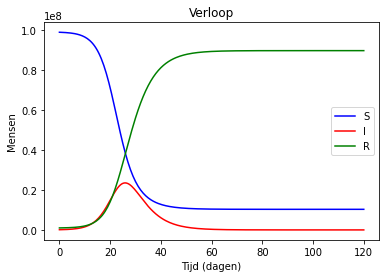

In [19]:
h = 0.5                       # days
transmission_coeff = 5e-9     # 1 / day person

end_time = 120.0              # days
num_steps = int(end_time / h)

def sir_model(h = 0.5):
    s = [1e8 - 1e6 - 1e5]
    i = [1e5]
    r = [1e6]
    t = [0]

    for step in range(num_steps):
        s2i = h * transmission_coeff * i[step] * s[step]
        i2r = h * 0.2 * i[step]
        
        t.append(t[step] + h)
        s.append(s[step] - s2i)
        i.append(i[step] + s2i - i2r)
        r.append(r[step] + i2r)

    return s, i, r, t

s, i, r, t = sir_model()

plt.plot(t, s, 'b', label='S')
plt.plot(t, i, 'r', label='I')
plt.plot(t, r, 'g', label='R')
plt.legend()
plt.title("Verloop")
plt.xlabel("Tijd (dagen)")
plt.ylabel("Mensen")
plt.show()

## SEIR Model
- (Mogelijke) uitbreiding op SIR
- I wordt opgedeeld:
  - Exposed (besmet maar nog niet ziek of besmettelijk)
  - Infectious (ziek / besmettelijk)
- Infectie (S naar E) hangt af van I en een reproductiegetal
- E naar I hangt af van latency (vertraging)

![](SEIR.png)

$$S(t+h) = S(t) + h \cdot \frac{-5\times 10^{-9}}{day \cdot person} I(t) S(t)$$
$$E(t+h) = E(t) + h \left(\frac{5\times 10^{-9}}{day \cdot person} I(t) S(t) - \frac{1}{1\ day} E(t)\right)$$
$$I(t+h) = I(t) + h \cdot \left(\frac{1}{1\ day}E(t) - \frac{1}{5\ days} I(t)\right)$$
$$R(t+h) = R(t) + h \cdot \frac{1}{5\ days} I(t)$$


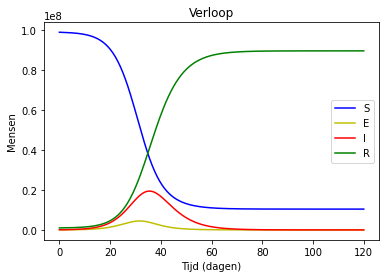

In [3]:
h = 0.5                       # days
transmission_coeff = 5e-9     # 1 / day person
latency = 1

end_time = 120.0              # days

def seir_model(h = 0.5):
    num_steps = int(end_time / h)
    s = [1e8 - 1e6 - 1e5]
    e = [0]
    i = [1e5]
    r = [1e6]
    t = [0]

    for step in range(num_steps):

        s2e = h * transmission_coeff * i[step] * s[step]
        e2i = h * latency * e[step]
        i2r = h * 0.2 * i[step]

        t.append(t[step] + h)
        s.append(s[step] - s2e)
        e.append(e[step] + s2e - e2i)
        i.append(i[step]       + e2i - i2r)
        r.append(r[step]             + i2r) 

    return s, e, i, r, t

s, e, i, r, t = seir_model()

plt.plot(t, s, 'b', label='S')
plt.plot(t, e, 'y', label='E')
plt.plot(t, i, 'r', label='I')
plt.plot(t, r, 'g', label='R')
plt.legend()
plt.title("Verloop")
plt.xlabel("Tijd (dagen)")
plt.ylabel("Mensen")
plt.show()

## Zouttank
- Modelleren aantal kilo zout in de tank
- Makkelijker dan de concentratie bijhouden
- Omrekenen naar concentratie voor output (plot)
- Zout op $t=0$ is $0$
- Concentratie loopt op to $0.1 \text{kg} / \text{l}$

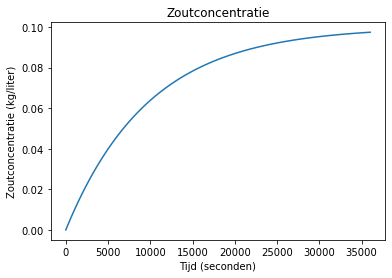

In [6]:
content = 1000             # liter
flow_in = 6 / 60           # liter / seconde
concentration_in = 0.1     # kg / liter
flow_out = 6 / 60          # liter / seconde
kg_in = concentration_in * flow_in  

num_steps = 100
h = 10 * 3600 / 100 # in seconden

salt = [0]

for step in range(num_steps):
    concentration_out = salt[step] / content # kg / liter
    salt.append(salt[step] + h * (kg_in - concentration_out * flow_out))

plt.plot([t * h for t in range(num_steps+1)], [s / content for s in salt])
plt.title("Zoutconcentratie")
plt.xlabel("Tijd (seconden)")
plt.ylabel("Zoutconcentratie (kg/liter)")
plt.show()

## Extra Oefening: Alcoholafbraak

**De waardes in deze oefening zijn maar deels op de werkelijkheid gebaseerd (biology is complicated!), dus gebruik deze rekensom niet om je verkeersdeelname en/of alcoholconsumptie te baseren!**. Voor de eenheden in deze som geldt promilage (‰) als een getal berekend ten opzichte van de hoeveelheid vocht in een lichaam. Behandel deze waardes als concrete eenheden, dus $0.2‰ - 0.1‰ = 0.1‰$. Percentages worden wel behandeld als fracties, dus $0.5‰ - 20\% = 0.5‰ - 0.1‰ = 0.4‰$.

Alice drinkt tussen 2000 en 2100u $4$ glazen wijn. De twee uur hierna drinkt ze elk uur nog een enkel glas, waarna Alice stopt met drinken voor de avond. Gezien Alice' lichaamsgewicht komt ieder glas neer op $0.3‰$ alcohol. Vanaf het moment dat Alice begint met drinken wordt ieder uur alcohol een op een omgezet in acetaldehyde: $60\%$ van de hoeveelheid alcohol tot een maximum van $0.2‰$ per uur. Gelijktijdig wordt de acetaldehyde ook weer met $20\%$ per uur omgezet in azijnzuur (acetic acid). Azijnzuur wordt met $50\%$ per uur afgebroken tot lichaamseigen stoffen.

Vanaf welk tijdstip heeft Alice minder dan $0.5‰$ alchohol in haar bloed (de wettelijke grens voor verkeersdeelname)? Hoe lang duurt het tot de hoeveelheid acetaldehyde onder de $0.2‰$ komt en haar kater begint te verminderen?

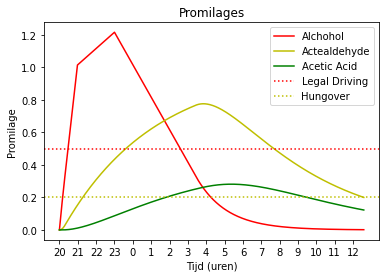

In [ ]:
h = 1/60 # 1 minuut

alcohol = [0]
acetaldehyde = [0]
acetic_acid = [0]
time = [20]
t = 0

# While loop omdat we niet weten hoelang de simulatie duurt...
while alcohol[-1] > 0.5 or acetaldehyde[-1] > 0.2 or t < 6*60:
    t += 1
    
    alchohol_to_acetaldehyde    = min(0.2, 0.6 * alcohol[-1])
    acetaldehyde_to_acetic_acid = 0.2 * acetaldehyde[-1]
    acetic_acid_metabolised     = 0.5 * acetic_acid[-1]
    
    if t < 60:
        alcohol.append(alcohol[-1] + h * (1.2 - alchohol_to_acetaldehyde))
    elif t <= 180:
        alcohol.append(alcohol[-1] + h * (0.3 - alchohol_to_acetaldehyde))
    else:
        alcohol.append(alcohol[-1] + h * (    - alchohol_to_acetaldehyde))
        
    acetaldehyde.append(acetaldehyde[-1] + h * (alchohol_to_acetaldehyde - acetaldehyde_to_acetic_acid))
    
    acetic_acid.append(acetic_acid[-1] + h * (acetaldehyde_to_acetic_acid - acetic_acid_metabolised))
    
plt.plot(alcohol, 'r', label="Alchohol")
plt.plot(acetaldehyde, 'y', label="Actealdehyde")
plt.plot(acetic_acid, 'g', label="Acetic Acid")
plt.axhline(y = 0.5, color = 'r', linestyle = 'dotted', label="Legal Driving")
plt.axhline(y = 0.2, color = 'y', linestyle = 'dotted', label="Hungover")
plt.title("Promilages")
plt.xlabel("Tijd (uren)")
plt.ylabel("Promilage")
plt.legend()
plt.xticks(ticks= list(map(lambda x: x*60, range(1+t//60))), labels=map(lambda x: x % 24, range(20,21+t//60)))
plt.show()

## Les 4
- Socrative
- Opdrachten

## Vandaag
- Stiffness
- Impliciete methoden - Backward Euler

### Stifness
- Hevige oscilatie op (te) grote stapgrootte, nog voor "exploderen"
- Zichtbaar in SEIR, niet in SIR
- Komt voor wanneer meerdere tijdschalen meespelen, en in formules van de vorm
$$\frac{dy}{dt} = -n \cdot y(t)$$
met grote $n$.

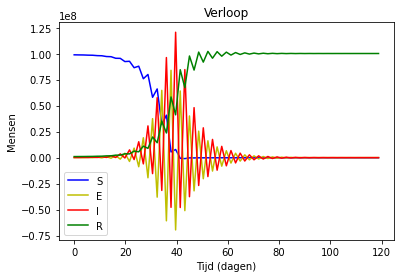

In [5]:
s, e, i, r, t = seir_model(1.8)

plt.plot(t, s, 'b', label='S')
plt.plot(t, e, 'y', label='E')
plt.plot(t, i, 'r', label='I')
plt.plot(t, r, 'g', label='R')
plt.legend()
plt.title("Verloop")
plt.xlabel("Tijd (dagen)")
plt.ylabel("Mensen")
plt.show()

### Intermezzo: Distributiviteit en Rekenregels
Voor het verbouwen van formules voor Backwards Euler kan de volgende rekenregel van pas komen:

$$a(b+c) = ab + ac$$

Specifiek in de voorbeelden die we hier tegenkomen ziet de regel er vaak als volgt uit, met een (impliciete) $1$ die je toe moet voegen:

$$a + ac = a \cdot 1 + a c = a (1 + c)$$

Hiernaast zul je termen aan beide kanten moeten optellen / aftrekken / vermenigvuldigen / delen. Dit kun je gebruiken om een term naar de andere kant van de $=$ te werken, zodat je de term waar je naar op zoek bent (bijvoorbeeld $X(t+h)$) kunt isoleren:

$$\begin{align} a + b & = c\\ & \Downarrow \\ a + b - b & = c - b \\ & \Downarrow \\ a & = c - b \end{align}$$

### Auto
Herschrijf het voorbeeld van de auto naar Backwards Euler.

$$W(t+h) = W(t) - 0.1 \cdot h \cdot W(t)$$
##### Backward Euler
$$W(t+h) = W(t) - 0.1 \cdot h \cdot W(t+h)$$
##### Beide kanten $0.1 h \cdot W(t+h)$ erbij
$$W(t+h) + 0.1 h \cdot W(t+h) = W(t)$$
##### Distributie
$$W(t+h)(1 + 0.1h) = W(t)$$
##### Beide kanten delen door $1+0.1 h$
$$W(t+h) = \frac{W(t)}{1+0.1 h}$$


### Mieren
Herschrijf het voorbeeld van de mierenkolonie naar Backwards Euler.

$$A(t+h) = A(t) + h \cdot (1000 - 0.2 \cdot A(t))$$
##### Backward Euler
$$A(t+h) = A(t) + 1000h - 0.2 h \cdot A(t+h)$$
##### Beide kanten $0.2 h \cdot A(t+h)$ erbij
$$A(t+h) + 0.2 h \cdot A(t+h) = A(t) + 1000h$$
##### Distributie
$$A(t+h)(1 + 0.2h) = A(t) + 1000h$$
##### Beide kanten delen door $1+0.2 h$
$$A(t+h) = \frac{A(t)+1000h}{1+0.2 h}$$

## Oefening SEIR
Herschrijf de vergelijkingen voor het SEIR model naar Backwards Euler. Ga er voor nu even vanuit dat iedere vergelijking op zichzelf mag staan, en dat verwijzingen naar andere vergelijkingen (uitgevoerd op $t=2$) beschikbaar zijn. In de praktijk is dit niet te programmeren en zul je ergens een uitgebreide formule moeten programmeren die alleen van waardes op $t=1$ afhankelijk is, maar dit is erg harig proces...

Om de zaak iets leesbaarder te houden stappen we hier over op een iets andere notatie. We vervangen $X(t)$ door $X_1$ en $X(t+h)$ door $X_2$. Daarnaast maken we variabelen voor alle constanten, zodat we geen onnodige breuken heen en weer schuiven. Ik gebruik hier Griekse letters die aanduiden waar de constante over gaat:

##### Lengte van de **Z**iekte (Zeta)
$$\zeta = \frac{1}{5\ days}$$

##### **B**esmettelijkheid (Beta)
$$\beta = \frac{5\times 10^{-9}}{day \cdot person}$$

##### **L**atency (Lambda)
$$\lambda = \frac{1}{1\ day}$$

Je mag dit overnemen (hoeft niet), maar het kan helpen de formules overzichtelijk te houden. Let wel op het verschil tussen bijvoorbeeld $\beta$ en $-\beta$.

### Removed
$$R(t+h) = R(t) + h \cdot \frac{1}{5\ days} I(h)$$
##### Opschonen
$$R_2 = R_1 + h \cdot \zeta I_1$$
### Susceptible
$$S(t+h) = S(t) + h \cdot \frac{-5\times 10^{-9}}{day \cdot person} I(t) S(t)$$
##### Opschonen
$$S_2 = S_1 + h \cdot (-\beta I_1 S_1)$$
### Infected
$$I(t+h) = I(t) + h \cdot \left(\frac{1}{1\ day}E(t) - \frac{1}{5\ days} I(t)\right)$$
##### Opschonen
$$I_2 = I_1 + h \cdot \left(\lambda E_1 - \zeta I_1\right)$$
### Exposed
$$E(t+h) = E(t) + h \left(\frac{5\times 10^{-9}}{day \cdot person} I(t) S(t) - \frac{1}{1\ day} E(t)\right)$$
##### Opschonen
$$E_2 = E_1 + h \left(\beta I_1 S_1 - \lambda E_1\right)$$

# 

# 

# 

# 

## Uitwerking

### Removed
$$R(t+h) = R(t) + h \cdot \frac{1}{5\ days} I(h)$$
##### Opschonen
$$R_2 = R_1 + h \cdot \zeta I_1$$
#### Backward Euler
$$R_2 = R_1 + h \cdot \zeta I_2$$

### Susceptible
$$S(t+h) = S(t) + h \cdot \frac{-5\times 10^{-9}}{day \cdot person} I(t) S(t)$$
##### Opschonen
$$S_2 = S_1 + h \cdot (-\beta I_1 S_1)$$
#### Backward Euler
$$S_2 = S_1 + h \cdot (-\beta I_2 S_2)$$
##### Beide kanten $h \cdot -(\beta I_2 S_2)$ eraf
$$S_2 - h \cdot (-\beta I_2 S_2) = S_1$$
##### Dubbele inverse
$$S_2 + h \cdot \beta I_2 S_2 = S_1$$
##### Distributie
$$S_2 \left(1 + h \cdot \beta I_2\right) = S_1$$
##### Beide kanten delen door $1+h\cdot \beta I_2$
$$S_2 = \frac{S_1}{1 + h \cdot \beta I_2}$$

### Infected
$$I(t+h) = I(t) + h \cdot \left(\frac{1}{1\ day}E(t) - \frac{1}{5\ days} I(t)\right)$$
##### Opschonen
$$I_2 = I_1 + h \cdot \left(\lambda E_1 - \zeta I_1\right)$$
#### Backward Euler
$$I_2 = I_1 + h \left(\lambda E_2 - \zeta I_2\right)$$
##### Distributie
$$I_2 = I_1 + h \lambda E_2 - h \zeta I_2$$
##### Beide kanten $h \zeta I_2$ erbij
$$I_2 + h \zeta I_2 = I_1 + h \lambda E_2$$
##### Distributie
$$\left(1 + h \zeta\right) I_2 = I_1 + h \lambda E_2$$
##### Beide kanten delen door $ 1+h \zeta$
$$I_2 = \frac{I_1 + h \lambda E_2}{1 + h \zeta}$$

### Exposed
$$E(t+h) = E(t) + h \left(\frac{5\times 10^{-9}}{day \cdot person} I(t) S(t) - \frac{1}{1\ day} E(t)\right)$$
##### Opschonen
$$E_2 = E_1 + h \left(\beta I_1 S_1 - \lambda E_1\right)$$
##### Backward Euler
$$E_2 = E_1 + h \left(\beta I_2 S_2 - \lambda E_2\right)$$
##### Distributie
$$E_2 = E_1 + h \cdot \beta I_2 S_2 - h \cdot \lambda E_2$$
##### Beide kanten $h \cdot \lambda E_2$ erbij
$$E_2 + h \cdot \lambda E_2 = E_1 + h \cdot \beta I_2 S_2$$
##### Distributie
$$E_2 (1 + h \cdot \lambda) = E_1 + h \cdot \beta I_2 S_2$$
##### Beide kanten delen door $1 + h \cdot \lambda$
$$E_2 = \frac{E_1 + h \cdot \beta I_2 S_2}{1 + h \cdot \lambda}$$

### Probleem
- Dit werkt op het niveau van een enkele DE, maar in een systeem van DEs houden we circulaire afhankelijkheden. 

$$R_2 = R_1 + h \cdot \zeta I_2$$

$$S_2 = \frac{S_1}{1 + h \cdot \beta I_2}$$

$$I_2 = \frac{I_1 + h \lambda E_2}{1 + h \zeta}$$

$$E_2 = \frac{E_1 + h \cdot \beta I_2 S_2}{1 + h \cdot \lambda}$$

### Oplossing
De oplossing is om de afhankelijkheden (in een van de formules) te vervangen door de definities, net zo lang totdat we alleen nog termen op $t = 1$ en $E_2$ overhouden. Als we deze kunnen isoleren kunnen we de differentiaalvergelijking uitprogrammeren.

Dit geeft al snel erg harige formules, zeker zonder de opgeschoonde notatie. Dit gaat de scope (en algebraische vaardigheid) die van jullie in dit vak verwachten voorbij; de bottom line is dat je dit niet met de hand wil doen.

***Here be dragons.***

## Les 5
- Socrative
- Herhaling / vragen

## SIR-model met Heun

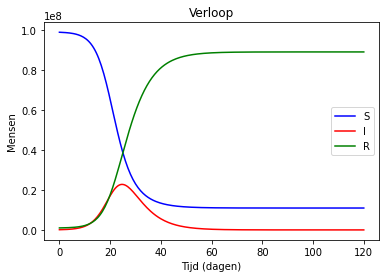

In [79]:
h = 0.5                       # days
transmission_coeff = 5e-9     # 1 / day person

end_time = 120.0              # days
num_steps = int(end_time / h)

def sir_model(h = 0.5):
    s = [1e8 - 1e6 - 1e5]
    i = [1e5]
    r = [1e6]
    t = [0]

    for step in range(num_steps):
        s_euler = s[step] - h * transmission_coeff * i[step] * s[step]
        i_euler = i[step] + h * transmission_coeff * i[step] * s[step] - h * 0.2 * i[step]
        r_euler = r[step]                                              + h * 0.2 * i[step]
                    
        r_heun = r[step] + (h/2) * (0.2 * i[step] + 0.2 * i_euler)
        
        s_heun = s[step] - (h/2) * (transmission_coeff * i[step] * s[step]\
                                    + transmission_coeff * i_euler * s_euler)
        
        i_heun = i[step] + (h/2) * (transmission_coeff * i[step] * s[step]\
                                    - 0.2 * i[step]\
                                    + transmission_coeff * i_euler * s_euler\
                                    - 0.2 * i_euler)
        t.append(t[step] + h)
        s.append(s_heun)
        i.append(i_heun)
        r.append(r_heun)

    return s, i, r, t

s, i, r, t = sir_model()

plt.plot(t, s, 'b', label='S')
plt.plot(t, i, 'r', label='I')
plt.plot(t, r, 'g', label='R')
plt.legend()
plt.title("Verloop")
plt.xlabel("Tijd (dagen)")
plt.ylabel("Mensen")
plt.show()